# 10x Genomics Filter Artifacts
Notebook to remove the 10xGenomics mapping artifacts on the GRCh38 reference genome.

Dataset:
Breast Tissue nuclei section A 2000 cells
Single Cell CNV Dataset by Cell Ranger DNA 1.0.0

Overview: Nuclei extracted from section A of a frozen breast tumor tissue from a triple negative ductal carcinoma with an estimated tumor purity of 75%

    Num Cells: 2173
    Total Sequencing Reads: 2.32B
    Median Effective Reads per Mb: 218
    Sequencer: Novaseq
    Read Construct: 100 (R1), 8 (i7), 100 (R2)

A diploid sample mapped with GRCh38 reference is used to detect the artifacts.

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline

In [2]:
def merge_chromosomes(h5):
    
    n_cells = h5['cell_barcodes'].value.shape[0]
    all_chromosomes = list(h5['normalized_counts'].keys())
    # list of all cnv arrays
    cnv_matrices = []
    for chr in all_chromosomes:
        cnv_matrices.append(h5['normalized_counts'][chr].value[0:n_cells,:]) # select only the cells, not cell groups
        
    cell_all_chrs = np.concatenate(cnv_matrices, axis=1)
    return cell_all_chrs

def cnv_plot_one_dataset(mat, chr_pos=[], chr_texts=[]):
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(left=None, bottom=-0.3, right=None, top=None, wspace=None, hspace=None)
    ax = plt.subplot(311)
    ax.plot(mat,'r--')
    ax.axis([None, None, 0, 8])
    for i,pos in enumerate(chr_pos):
        ax.annotate(chr_texts[i], xy=(pos, 0),rotation=90, rotation_mode="anchor")
        ax.axvline(x=pos, ymin=0, ymax=1, ls='dashed', color='black', lw='0.2')
    ax.get_xaxis().set_visible(False)
    ax.legend(loc='upper left')
    #plt.show()
    return ax
    
def plot_1d_signal(mat,  min_val, max_val, chr_pos=None, chr_texts=None): # Todo: have chr pos and chr text visualised
    plt.figure(figsize=(40,30))
    plt.subplots_adjust(left=None, bottom=-0.3, right=None, top=None, wspace=None, hspace=None)
    ax = plt.subplot(311)
    ax.plot(mat,'b--')
    ax.axis([None, None, min_val, max_val])
    if chr_pos is not None:
        for i,pos in enumerate(chr_pos):
            ax.annotate(chr_texts[i], xy=(pos, 0.8),rotation=0, rotation_mode="anchor", clip_on=True)
            ax.axvline(x=pos, ymin=0, ymax=1, color='red', lw='5.5', ls='dotted')
    ax.get_xaxis().set_visible(False)
    #ax.legend(loc='upper left')
    #plt.show()
    return ax

In [3]:
def merge_chromosomes(h5):
    
    n_cells = h5['cell_barcodes'].value.shape[0]
    all_chromosomes = list(h5['normalized_counts'].keys())
    # list of all cnv arrays
    cnv_matrices = []
    for chr in all_chromosomes:
        cnv_matrices.append(h5['normalized_counts'][chr].value[0:n_cells,:]) # select only the cells, not cell groups
        
    cell_all_chrs = np.concatenate(cnv_matrices, axis=1)
    return cell_all_chrs

In [4]:
# filename = '../data/10X_sc_cnv/bj_mkn45_10pct_cnv_data.h5'
filename = '../data/10X_sc_cnv/breast_section_A/breast_tissue_A_2k_cnv_data.h5'
h5 = h5py.File(filename, 'r')

In [5]:
n_cells = h5['cell_barcodes'].value.shape[0]
all_chromosomes = list(h5['normalized_counts'].keys())

/Users/mtuncel/anaconda3/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [6]:
chr_lengths = []
for ch in all_chromosomes:
    chr_lengths.append(h5['normalized_counts'][ch][0:n_cells,:].shape[1])

In [7]:
chr_ends = np.cumsum(chr_lengths)
chr_ends

array([ 12448,  19138,  25893,  32557,  38276,  43629,  48729,  53246,
        57409,  61428,  64359,  76469,  79692,  82028,  84569,  94484,
       103995, 113072, 121613, 129581, 136838, 143758, 151561, 154423])

In [8]:
norm_counts = merge_chromosomes(h5)
h5.close()

/Users/mtuncel/anaconda3/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [9]:
norm_counts

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.142461  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96993124, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [10]:
norm_counts.shape

(2173, 154423)

In [11]:
(norm_counts.min(),norm_counts.max())

(0.0, 911.0493)

In [12]:
umbilical_path = '../data/CCGP3ANXX8/cnv_data.h5'
h5_umbilical = h5py.File(umbilical_path, 'r')
mat_umbilical = merge_chromosomes(h5_umbilical)
h5_umbilical.close()

/Users/mtuncel/anaconda3/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [13]:
mat_umbilical

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.1274056, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [1.9213356, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [14]:
mat_umbilical.shape

(307, 154423)

In [15]:
(mat_umbilical.min(),mat_umbilical.max())

(0.0, 2432.0)

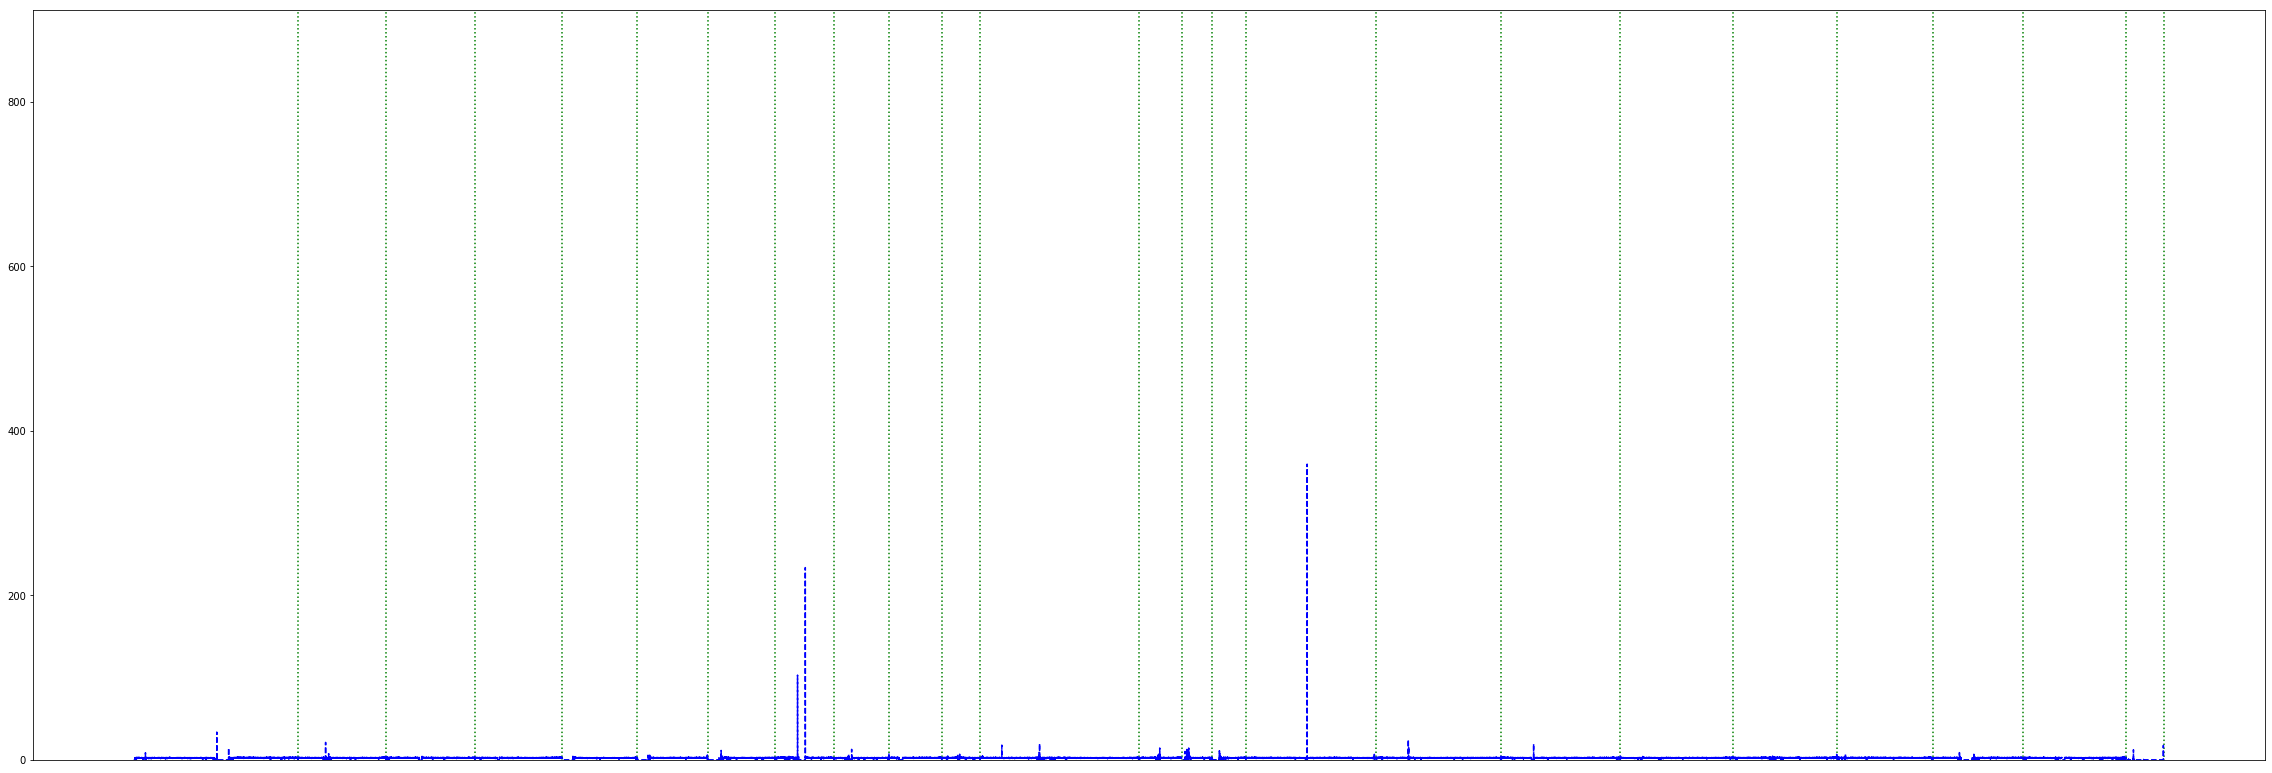

In [16]:
ax = plot_1d_signal(norm_counts.mean(0), norm_counts.min(),norm_counts.max())
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')

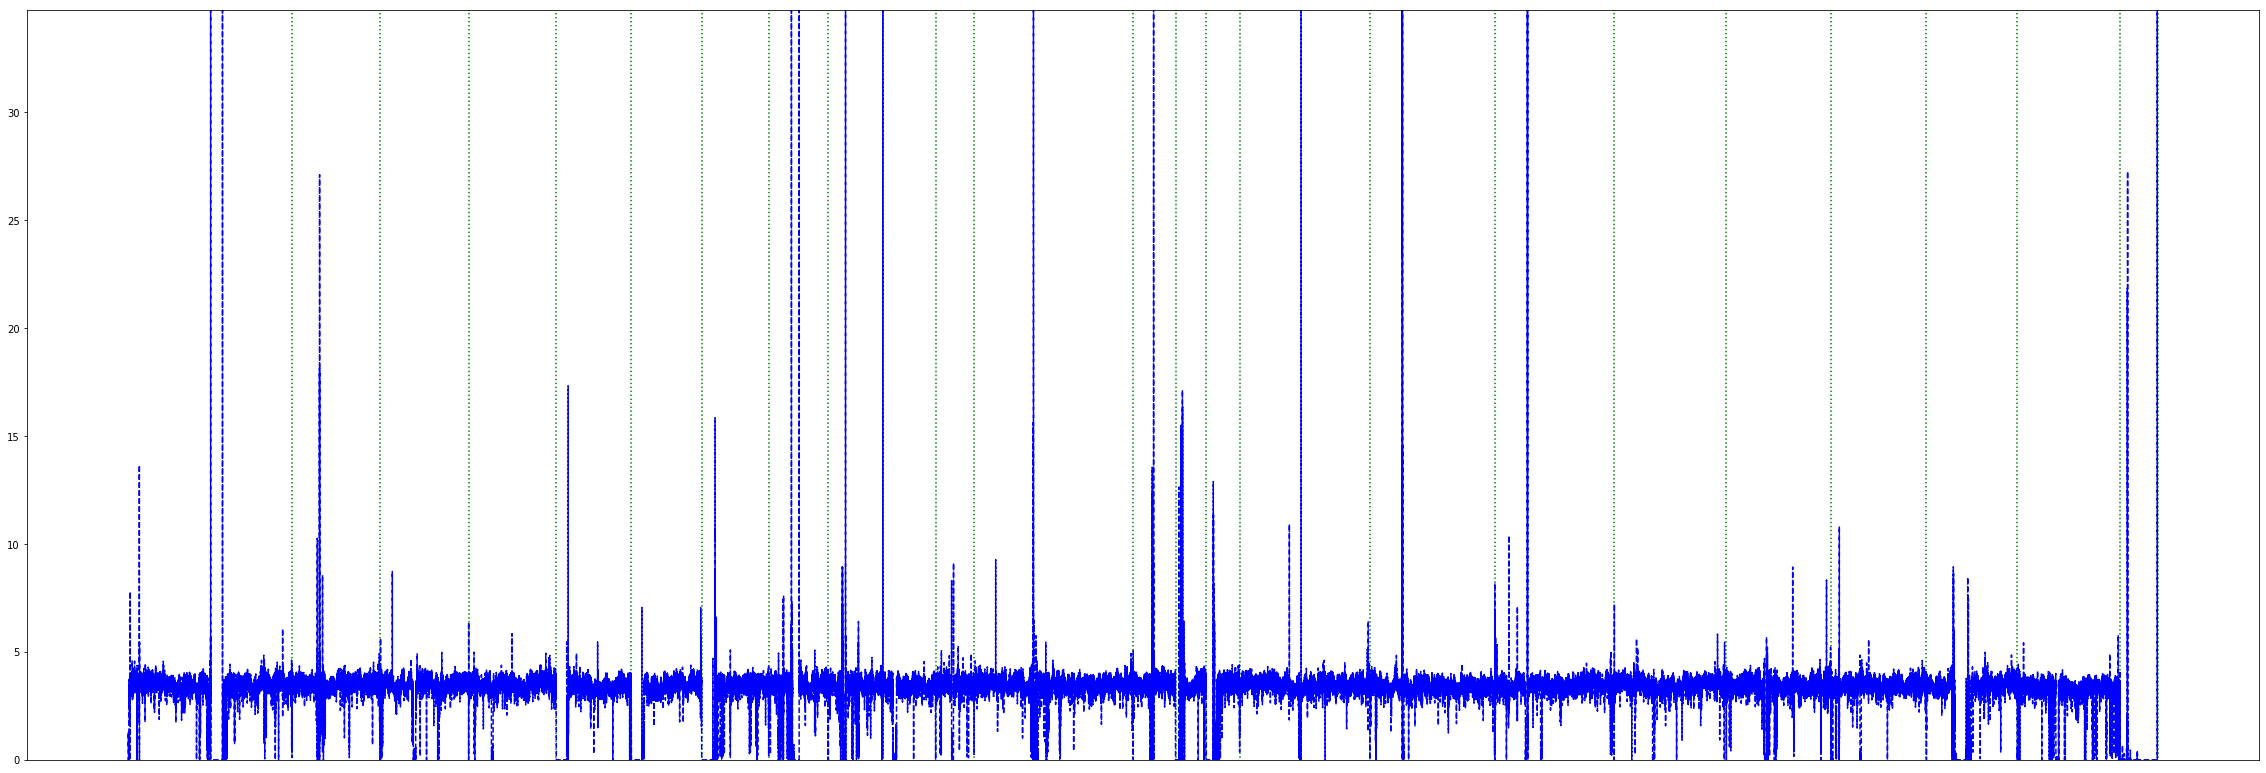

In [17]:
ax = plot_1d_signal(mat_umbilical.mean(0), mat_umbilical.min(),mat_umbilical.max()/70)
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')

In [18]:
chr_ends

array([ 12448,  19138,  25893,  32557,  38276,  43629,  48729,  53246,
        57409,  61428,  64359,  76469,  79692,  82028,  84569,  94484,
       103995, 113072, 121613, 129581, 136838, 143758, 151561, 154423])

In [19]:
peak_mask = mat_umbilical.mean(0) > 7 # the number is picked by inspection

In [20]:
peak_mask

array([False, False, False, ..., False, False, False])

In [21]:
norm_counts.mean(0).shape

(154423,)

In [22]:
peak_mask.shape

(154423,)

In [23]:
peak_mask.sum()

155

In [24]:
norm_counts.mean(0)[~peak_mask].shape

(154268,)

# Results

## 10xGenomics Data

### Before

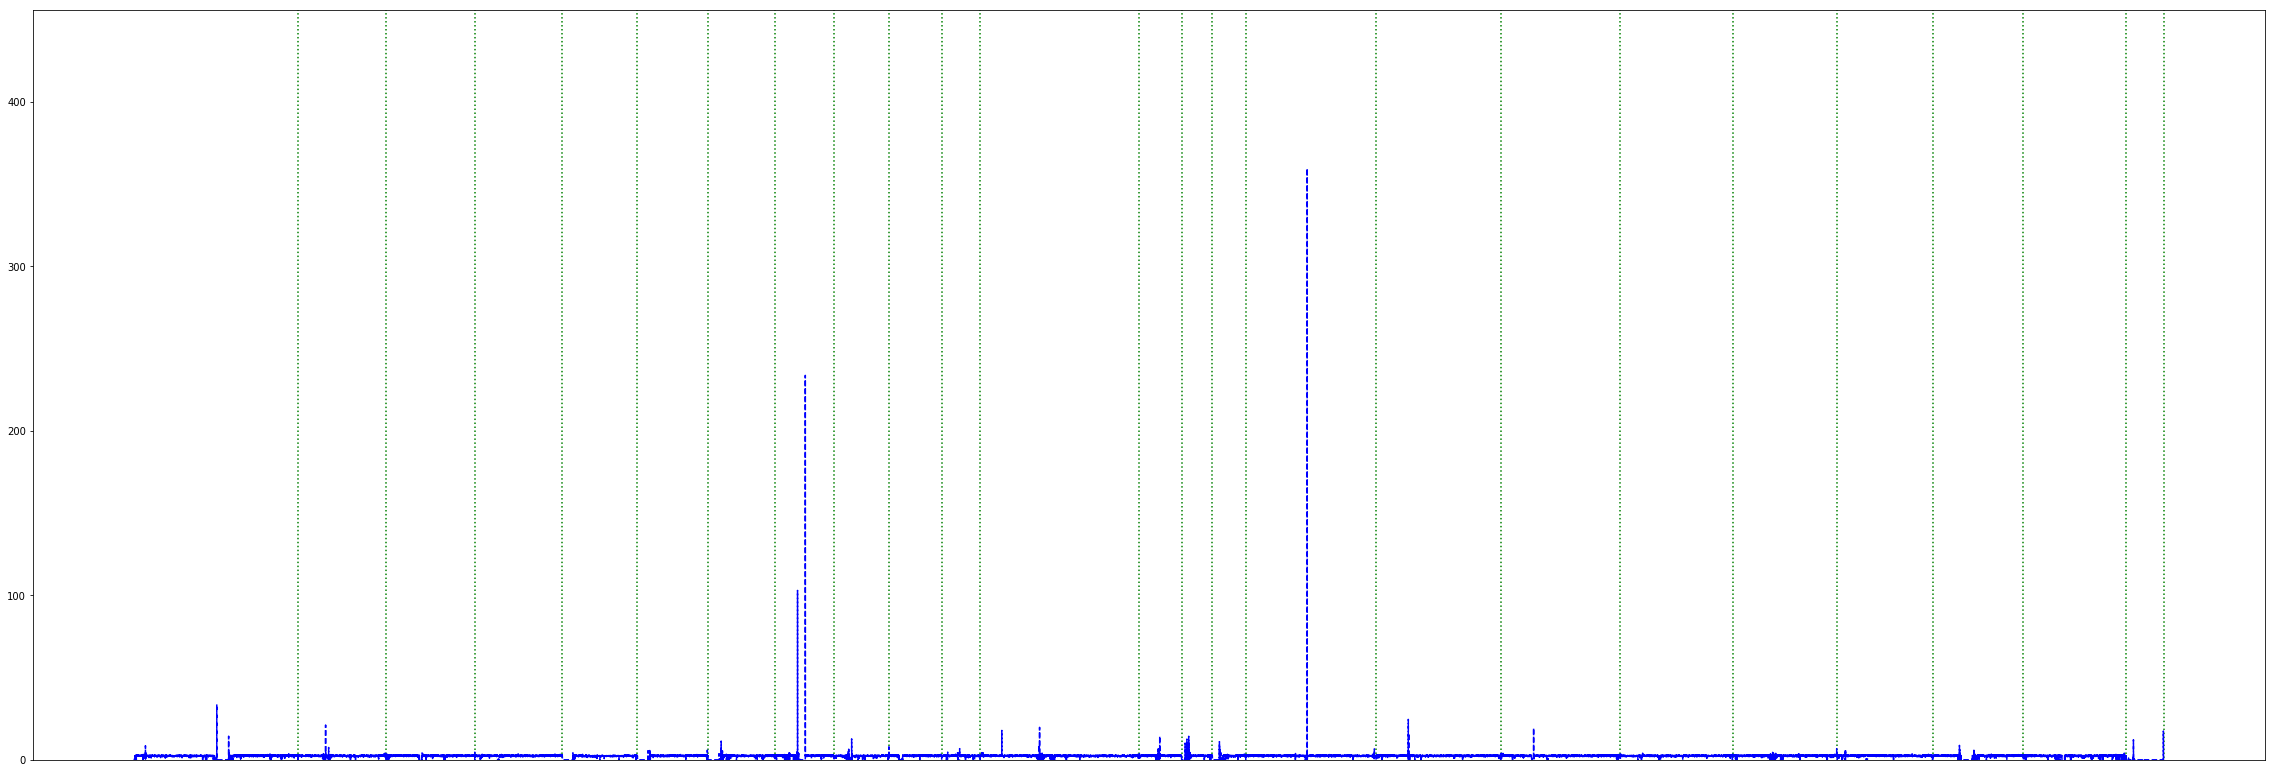

In [25]:
ax = plot_1d_signal(norm_counts.mean(0), norm_counts.min(),norm_counts.max()/2)
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')

### After

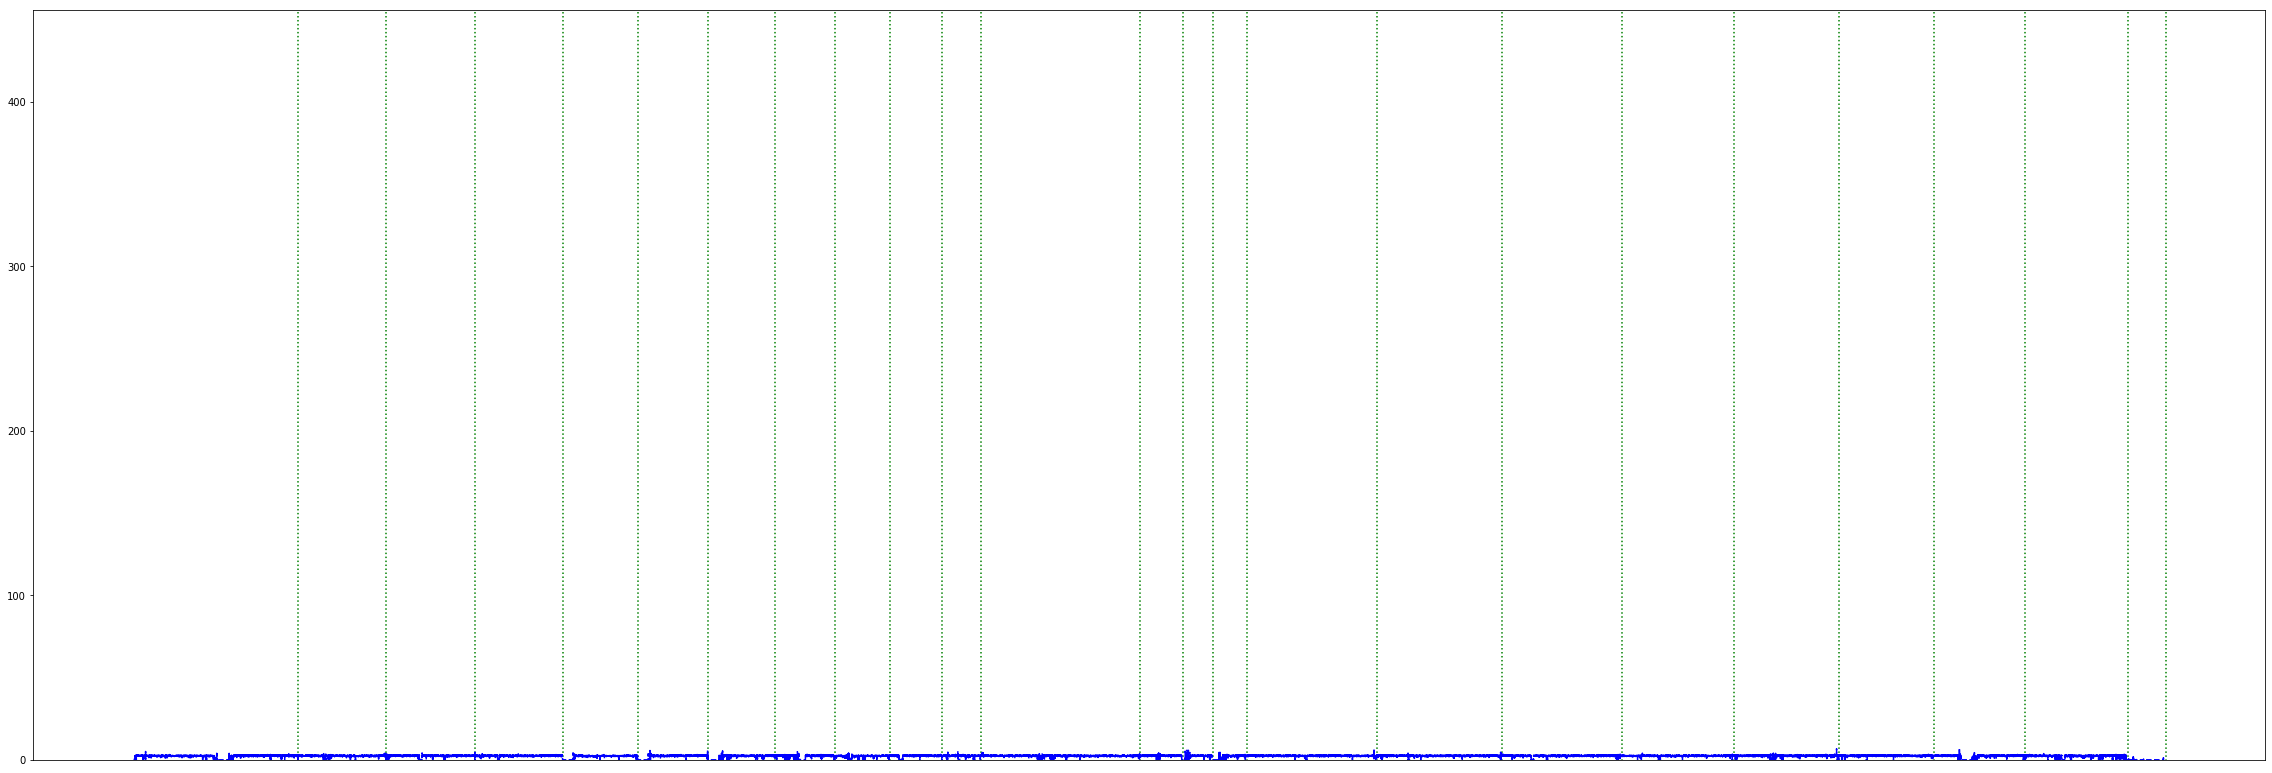

In [26]:
ax = plot_1d_signal(norm_counts.mean(0)[~peak_mask], norm_counts.min(),norm_counts.max()/2)
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')

## Umbilical Cord Data

### Before

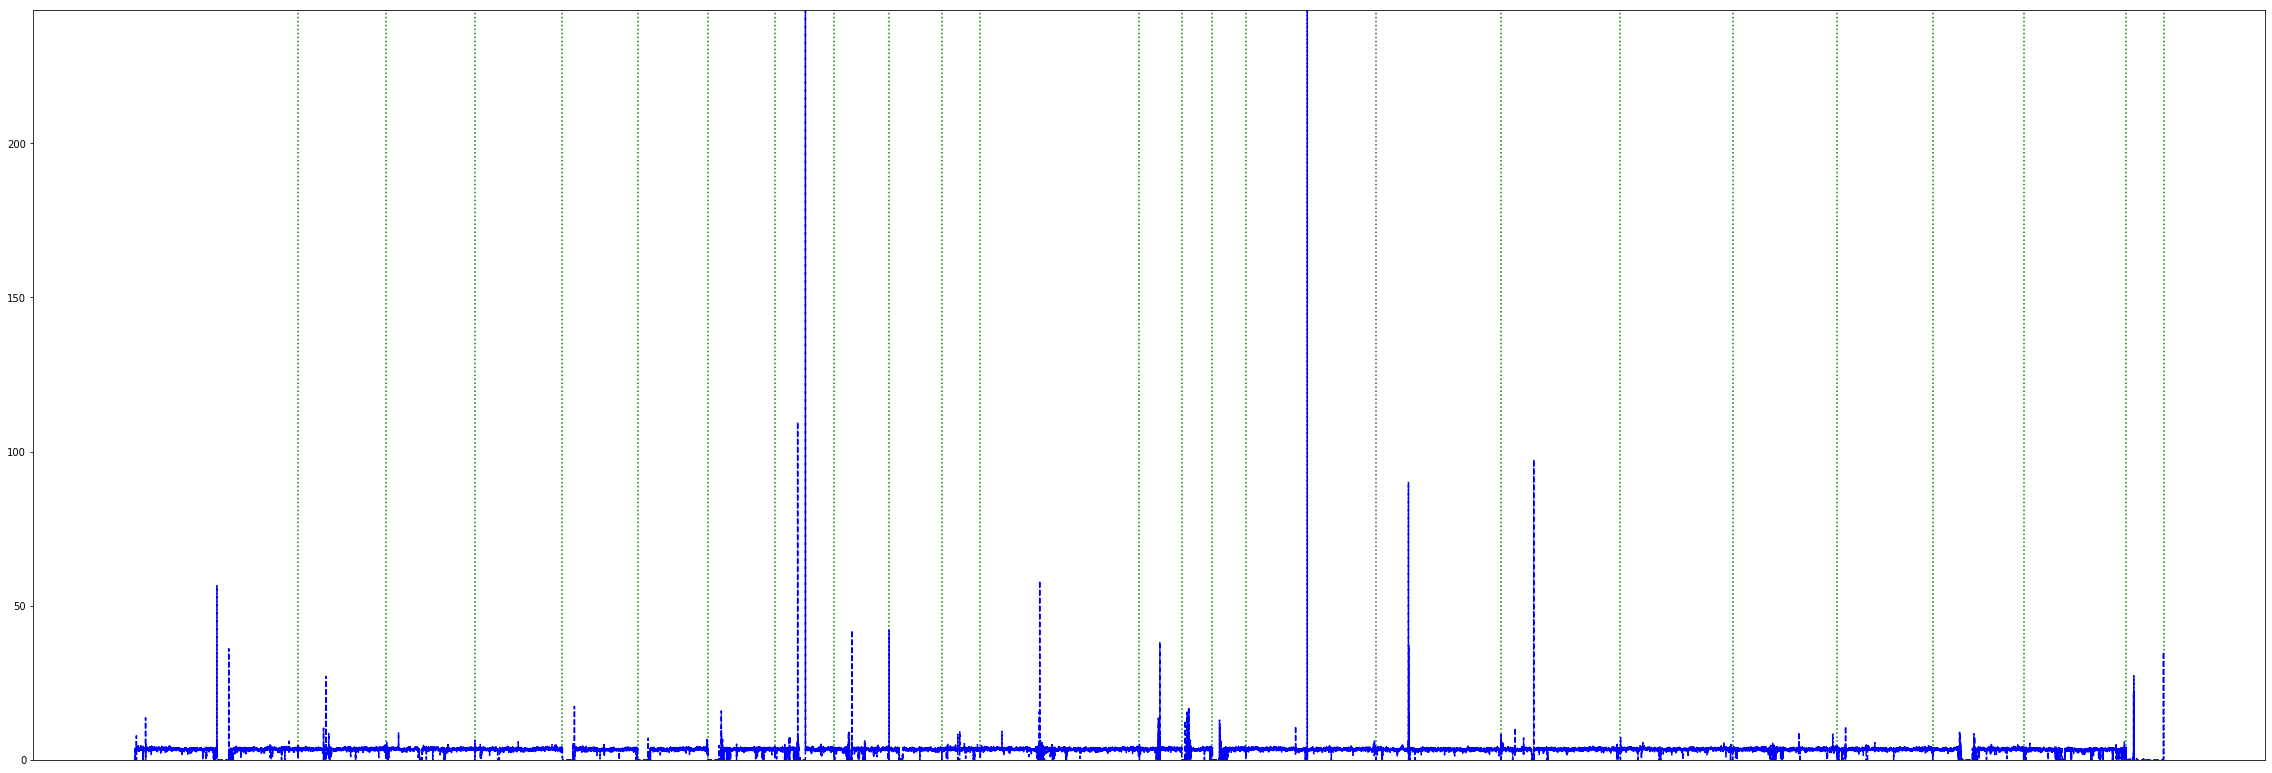

In [27]:
ax = plot_1d_signal(mat_umbilical.mean(0), mat_umbilical.min(),mat_umbilical.max()/10)
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')

### After

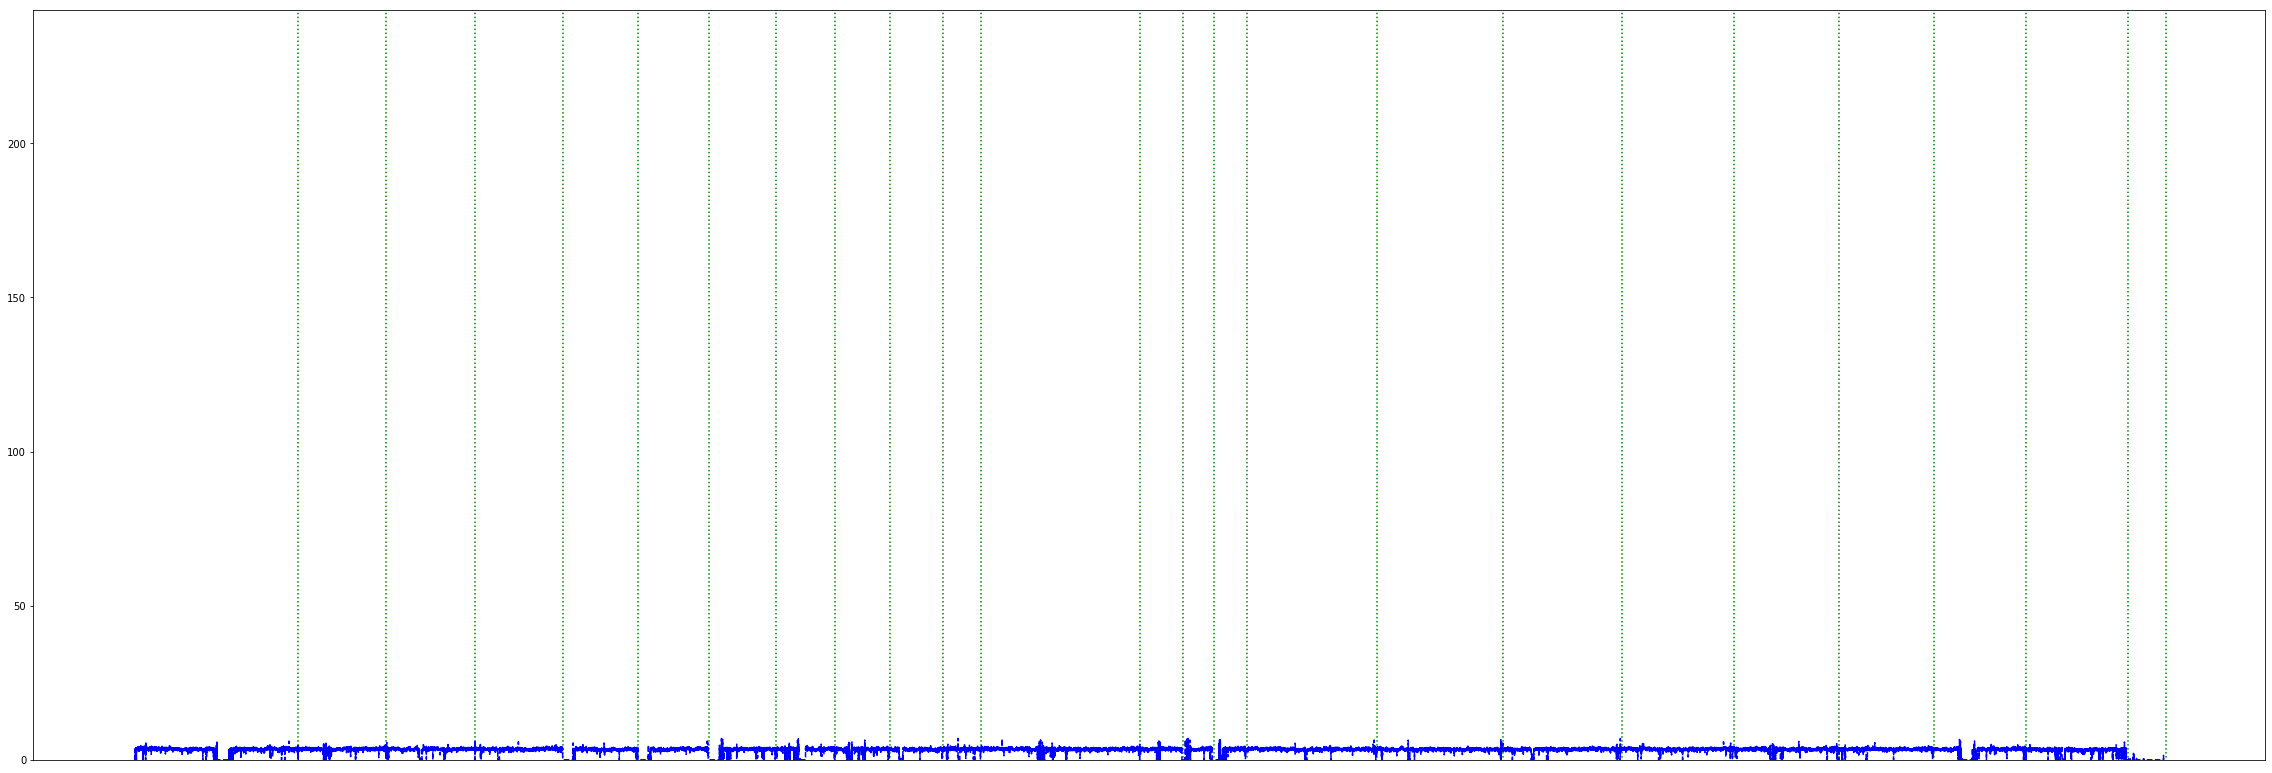

In [28]:
ax = plot_1d_signal(mat_umbilical.mean(0)[~peak_mask], mat_umbilical.min(),mat_umbilical.max()/10)
ax = ax.vlines(chr_ends, *ax.get_xlim(),colors='g', linestyles='dotted')